##Preparing our dataset

In [ ]:
#To keeep the page organized, we will do all of our imports here
import pandas as pd
from scipy import stats
import seaborn as sns
sns.set()

#Suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/pokemons.csv')

Now, we will do a quick examination of our dataset.

In [ ]:
df.shape

(1017, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1017 non-null   int64 
 1   name          1017 non-null   object
 2   rank          1017 non-null   object
 3   generation    1017 non-null   object
 4   evolves_from  1017 non-null   object
 5   type1         1017 non-null   object
 6   type2         1017 non-null   object
 7   hp            1017 non-null   int64 
 8   atk           1017 non-null   int64 
 9   def           1017 non-null   int64 
 10  spatk         1017 non-null   int64 
 11  spdef         1017 non-null   int64 
 12  speed         1017 non-null   int64 
 13  total         1017 non-null   int64 
 14  height        1017 non-null   int64 
 15  weight        1017 non-null   int64 
 16  abilities     1017 non-null   object
 17  desc          1017 non-null   object
dtypes: int64(10), object(8)
memory usage: 143.1+ KB


Notice that there are 1017 values for all columns. Hence, we can conclude that there are no null values in the data.

In [ ]:
df.head()

,id,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total,height,weight,abilities,desc
0,1,bulbasaur,ordinary,generation-i,nothing,grass,poison,45,49,49,65,65,45,318,7,69,overgrow chlorophyll,A strange seed was planted on its back at birt...
1,2,ivysaur,ordinary,generation-i,bulbasaur,grass,poison,60,62,63,80,80,60,405,10,130,overgrow chlorophyll,"When the bulb on its back grows large, it appe..."
2,3,venusaur,ordinary,generation-i,ivysaur,grass,poison,80,82,83,100,100,80,525,20,1000,overgrow chlorophyll,The plant blooms when it is absorbing solar en...
3,4,charmander,ordinary,generation-i,nothing,fire,None,39,52,43,60,50,65,309,6,85,blaze solar-power,"Obviously prefers hot places. When it rains, s..."
4,5,charmeleon,ordinary,generation-i,charmander,fire,None,58,64,58,80,65,80,405,11,190,blaze solar-power,"When it swings its burning tail, it elevates t..."


Before we start answering out research questions, notice that one of the questions we will be attempting in our proposal involves the correlation between total attack(attack + sp_attack) and total defense(defense + sp_defense). To better prepare our dataset, we can first create a new column called 'total_attack' and 'total_defense'.

In [ ]:
#Add new columns 'total_attack' and 'total_defense'
df['total_attack'] = df['atk'] + df['spatk']
df['total_defense'] = df['def'] + df['spdef']
df.head()

,id,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total,height,weight,abilities,desc,total_attack,total_defense
0,1,bulbasaur,ordinary,generation-i,nothing,grass,poison,45,49,49,65,65,45,318,7,69,overgrow chlorophyll,A strange seed was planted on its back at birt...,114,114
1,2,ivysaur,ordinary,generation-i,bulbasaur,grass,poison,60,62,63,80,80,60,405,10,130,overgrow chlorophyll,"When the bulb on its back grows large, it appe...",142,143
2,3,venusaur,ordinary,generation-i,ivysaur,grass,poison,80,82,83,100,100,80,525,20,1000,overgrow chlorophyll,The plant blooms when it is absorbing solar en...,182,183
3,4,charmander,ordinary,generation-i,nothing,fire,None,39,52,43,60,50,65,309,6,85,blaze solar-power,"Obviously prefers hot places. When it rains, s...",112,93
4,5,charmeleon,ordinary,generation-i,charmander,fire,None,58,64,58,80,65,80,405,11,190,blaze solar-power,"When it swings its burning tail, it elevates t...",144,123


Now we will describe the dataset.

In [ ]:
df['total'].describe()

count    1017.000000
mean      426.577188
std       112.432492
min       175.000000
25%       323.000000
50%       450.000000
75%       505.000000
max       720.000000
Name: total, dtype: float64

In [ ]:
df['weight'].describe()

count    1017.000000
mean      659.910521
std      1198.306370
min         1.000000
25%        85.000000
50%       280.000000
75%       682.000000
max      9999.000000
Name: weight, dtype: float64

In [ ]:
df['speed'].describe()

count    1017.000000
mean       67.060964
std        28.724702
min         5.000000
25%        45.000000
50%        65.000000
75%        88.000000
max       200.000000
Name: speed, dtype: float64

In [ ]:
df['total_attack'].describe()


count    1017.000000
mean      147.281219
std        47.573561
min        20.000000
25%       110.000000
50%       145.000000
75%       180.000000
max       300.000000
Name: total_attack, dtype: float64

In [ ]:
df['total_defense'].describe()

count    1017.000000
mean      142.269420
std        48.393118
min        35.000000
25%       105.000000
50%       140.000000
75%       175.000000
max       460.000000
Name: total_defense, dtype: float64

In [ ]:
df['def'].describe()

count    1017.000000
mean       72.215339
std        29.131082
min         5.000000
25%        50.000000
50%        70.000000
75%        90.000000
max       230.000000
Name: def, dtype: float64

#Question 1: *Is there a significant difference in total stats between legendary and ordinary pokemon?*

In [ ]:
#Group rows by 'rank'
legendary_pokemon = df.iloc[(df['rank'] == 'legendary').values]
legendary_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 143 to 1016
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             69 non-null     int64 
 1   name           69 non-null     object
 2   rank           69 non-null     object
 3   generation     69 non-null     object
 4   evolves_from   69 non-null     object
 5   type1          69 non-null     object
 6   type2          69 non-null     object
 7   hp             69 non-null     int64 
 8   atk            69 non-null     int64 
 9   def            69 non-null     int64 
 10  spatk          69 non-null     int64 
 11  spdef          69 non-null     int64 
 12  speed          69 non-null     int64 
 13  total          69 non-null     int64 
 14  height         69 non-null     int64 
 15  weight         69 non-null     int64 
 16  abilities      69 non-null     object
 17  desc           69 non-null     object
 18  total_attack   69 non-null  

In [ ]:
ordinary_pokemon = df.iloc[(df['rank'] == 'ordinary').values]
ordinary_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 0 to 1012
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             907 non-null    int64 
 1   name           907 non-null    object
 2   rank           907 non-null    object
 3   generation     907 non-null    object
 4   evolves_from   907 non-null    object
 5   type1          907 non-null    object
 6   type2          907 non-null    object
 7   hp             907 non-null    int64 
 8   atk            907 non-null    int64 
 9   def            907 non-null    int64 
 10  spatk          907 non-null    int64 
 11  spdef          907 non-null    int64 
 12  speed          907 non-null    int64 
 13  total          907 non-null    int64 
 14  height         907 non-null    int64 
 15  weight         907 non-null    int64 
 16  abilities      907 non-null    object
 17  desc           907 non-null    object
 18  total_attack   907 non-null  

There are 69 values for legendary pokemon and 907 values for ordinary pokemon. We will be using the ttest_ind() function to perform a t-test for these two samples. The null hypothesis is that there is no signficant difference in totals stats between legendary and ordinary pokemon.

In [ ]:
#We conduct the t-test using the ttest_ind() function
stats.ttest_ind(legendary_pokemon['total'], ordinary_pokemon['total'])

TtestResult(statistic=14.906222595494302, pvalue=2.0404048091668424e-45, df=974.0)

There is a difference of approximately 14.9 standard deviations between these two means. Note that the p-value is extremely small, which implies that there is a real difference. The total stats of legendary pokemon are significantly different from those of ordinary pokemon.

To further visualize the difference in total stats, we will be creating a histogram of both distributions using Seaborn.

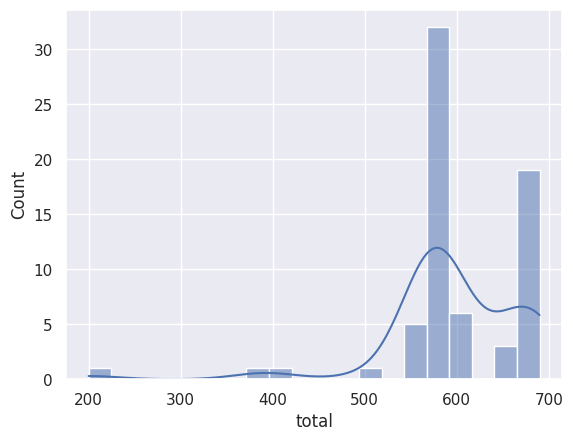

In [ ]:
lx = sns.histplot(legendary_pokemon['total'], bins=20, kde=True)

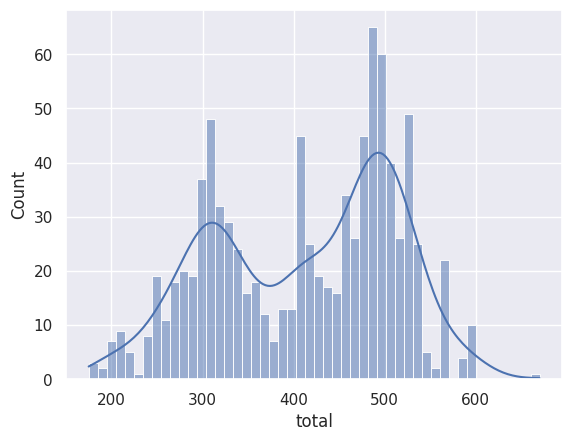

In [ ]:
ox = sns.histplot(ordinary_pokemon['total'], bins=50, kde=True)

#Question 2: *Is there a correlation between the weight and speed?*

In [ ]:
df['weight'].corr(df['speed'])

0.03730268965425686

The value is close to 0, which implies that there is little to no relationship between the weight and speed of a pokemon.

We will also visualize this relationship using a scatterplot.

<Axes: xlabel='weight', ylabel='speed'>

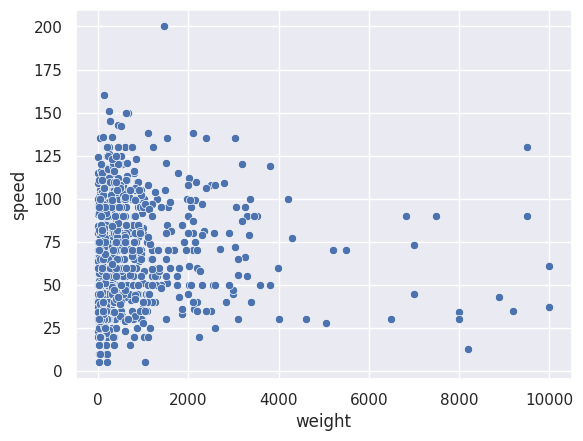

In [ ]:
sns.scatterplot(x='weight', y='speed', data=df)

#Question 3: *Is there a correlation between total attack(attack + special attack) and total defense(defense + total defense)?*

In [ ]:
df['total_attack'].corr(df['total_defense'])

0.4986475872222033

The value is approximately 0.5, which suggest that there is a moderate positiv relationship between total attack and total defense. As total attack increases, total defense increases as well, but not perfectly. The strength of the correlation indicates that the relationship is moderate, not very strong but still significant.

We visualize this relationship using a scatterplot.

<Axes: xlabel='total_attack', ylabel='total_defense'>

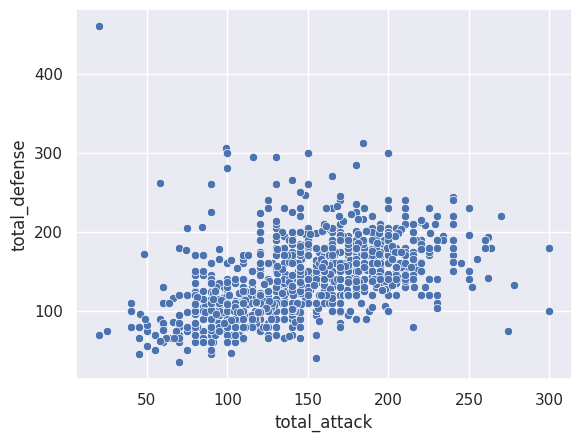

In [ ]:
sns.scatterplot(x='total_attack', y='total_defense', data=df)

#Question 4: *Is there a correlation between weight and defense?*

In [ ]:
df['weight'].corr(df['def'])

0.44973098336994544

We got a correlation coefficient of 0.44, which suggests that there is a moderate positive relationship between weight and defense. As weight increases, defense increases as well, but not perfectly. The strength of the correlation indicates that the relationship is moderate, not very strong but still significant.

We will visualize this relationship using a scatterplot.

<Axes: xlabel='weight', ylabel='def'>

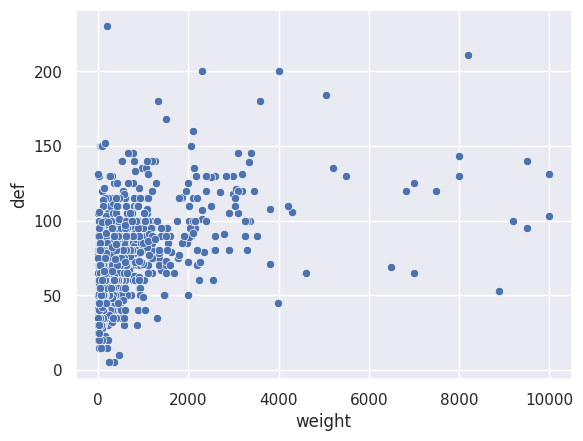

In [ ]:
sns.scatterplot(x='weight', y='def', data=df)

#Extra: *Based on the results in question 3, the results contracts my initial hypothesis because there seems to be a significant relationship between total attack and defense. This suggests that there is no tradeoff between total attack and total defense. However, I still hypothesize that there must be a tradeoff elsewhere. Perhaps there is a trade off between the regular stat and special stat (i.e. atk vs. spatk)? To make this analysis easier, we will be using the corr() to create a pairwise correlation table.*

In [ ]:
df[['atk', 'spatk', 'def', 'spdef']].corr( )

,atk,spatk,def,spdef
atk,1.000000,0.283469,0.466070,0.224800
spatk,0.283469,1.000000,0.203330,0.493796
def,0.466070,0.203330,1.000000,0.503644
spdef,0.224800,0.493796,0.503644,1.000000


Looking at our results from above, we see no negative correlation coefficients, and these pairs either have a significant positive or a negligible relationship. Hence, we can conclude that there is no tradeoff between any of the stats.

To plot multiple distributions in the dataset, we will be using the pairplot() function. It will compare all variables against each other in a matrix of plots.

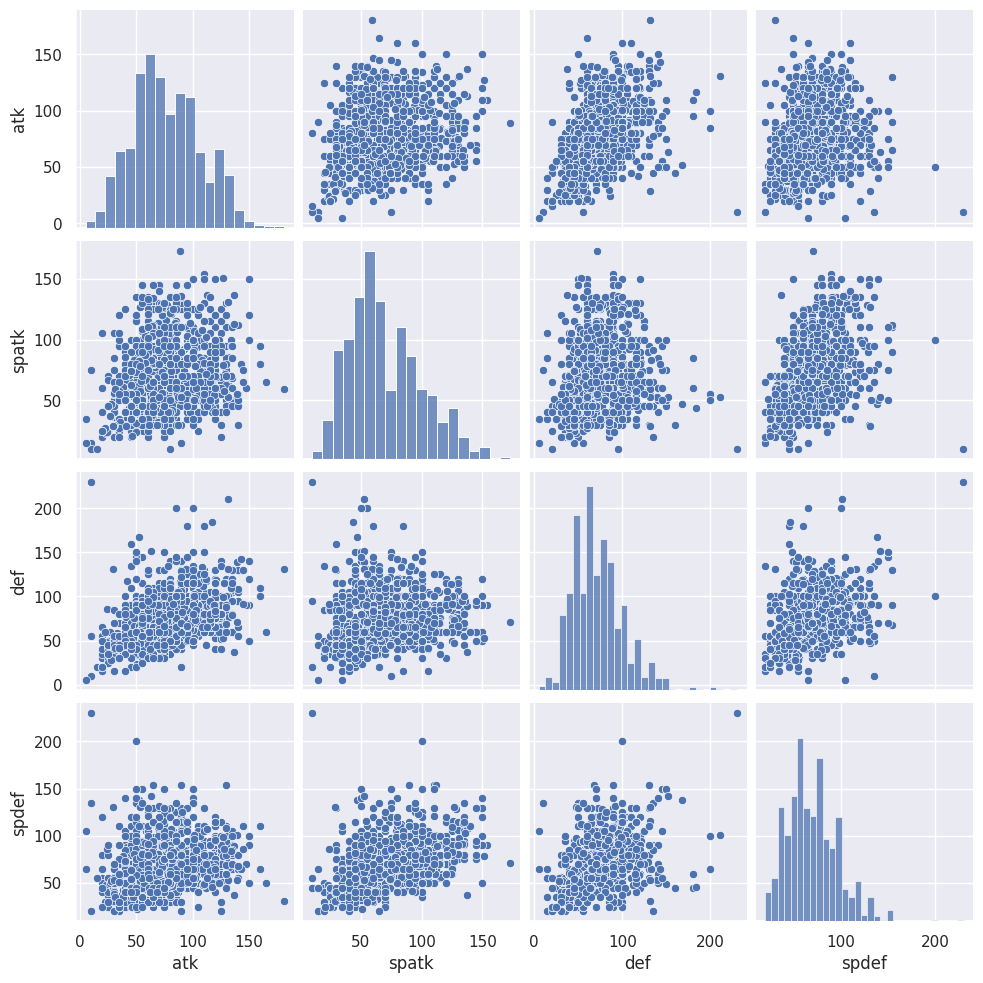

In [ ]:
sns.pairplot(df[['atk', 'spatk', 'def', 'spdef']])